'''Questions to answer
1) Which countries have maximum overall score?
2) Which countries have maximum potential score?
3) Which clubs have highest wages?
4) Which club have more value player?
5) Do player costs differ by player's age?
6) Do wages differ by player's age?
7) Does position have a say in a player's value?
'''

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expressions
import matplotlib.pyplot as plt # matplotlib for plotting
import seaborn as sns # seaborn for better graphics
import warnings
warnings.filterwarnings("ignore")

In [82]:
data = pd.read_csv('FIFA_data.csv', index_col = 'Unnamed: 0')
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [83]:
data.shape

(18207, 88)

In [84]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [85]:
data['Wage'] #Wage is in currency

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [86]:
data['Value']  #this is also in currency

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [87]:
# cleaning Wage and Value columns from currency to normal numbers
data['Wage'] = data['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))
data['Value'] = data['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.', '')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))

In [88]:
# getting top ten most popular countries
top_ten_countries = data['Nationality'].value_counts().head(10).index.values
top_ten_countries_data = data.loc[data['Nationality'].isin(top_ten_countries), :]

In [89]:
top_ten_countries_data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,https://cdn.sofifa.org/teams/2/light/15015.png,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [90]:
top_ten_countries

array(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil',
       'Italy', 'Colombia', 'Japan', 'Netherlands'], dtype=object)

In [91]:
data['Overall'].dtypes

dtype('int64')

# Which countries have maximum overall score?

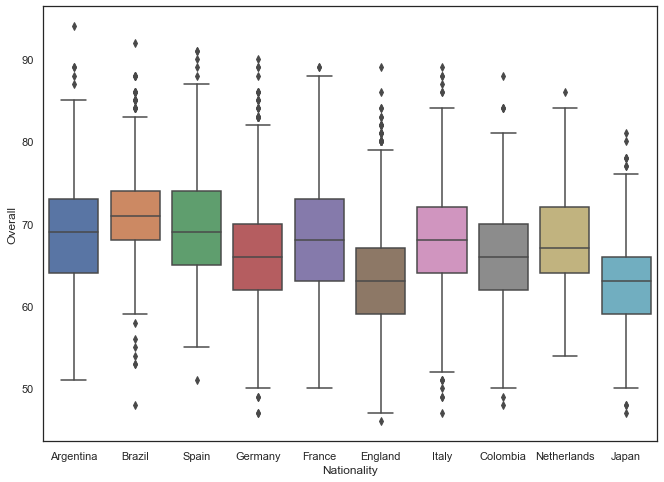

In [92]:
sns.set(style="white")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Overall', data = top_ten_countries_data)

Spain, Brazil and Argentina have the players with highest overall scores, followed closely by France and Italy.

# Which countries have maximum potential score?

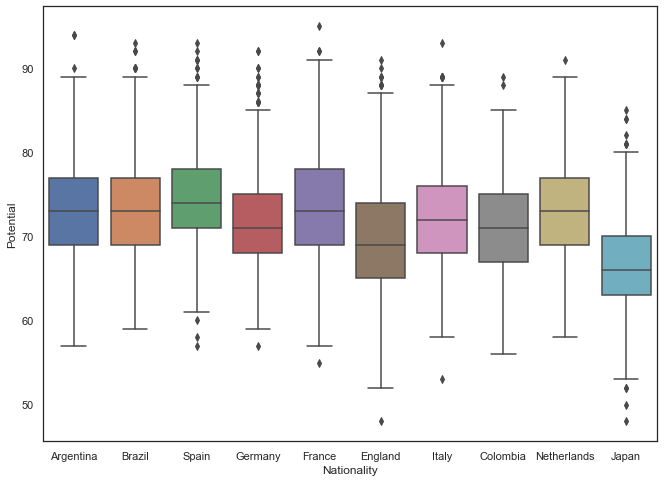

In [93]:
sns.set(style="white")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Potential', data = top_ten_countries_data)

Spain have the highest potential followed closely by Brazil, Argentina and France, a bit different from overall scores..

In [94]:
# getting top ten clubs
top_ten_colubs = data['Club'].value_counts().head(10).index.values
top_ten_clubs_data = data.loc[data['Club'].isin(top_ten_clubs), :]

# Which clubs have highest wages?

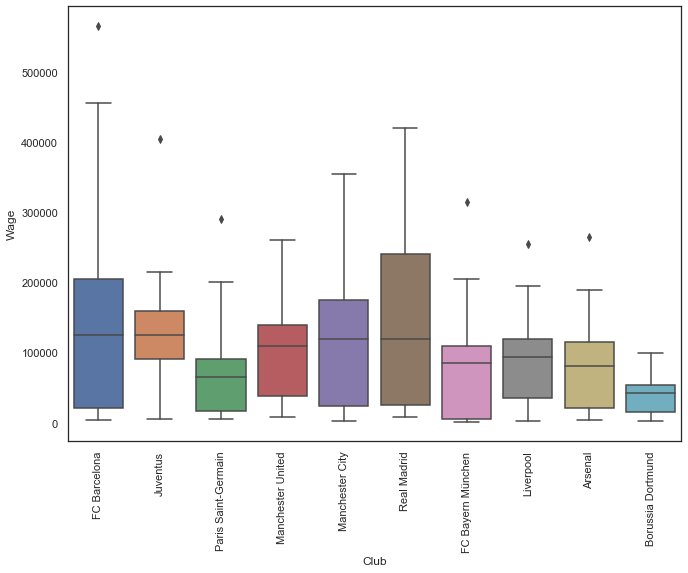

In [95]:
sns.set(style="white")
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Club', y = 'Wage', data = top_ten_clubs_data)
p = plt.xticks(rotation=90)

FC Barcelona and Real Madrid have the highest wage budgets, followed closely by Juventus and Manchester City.

# Which club have more value player?

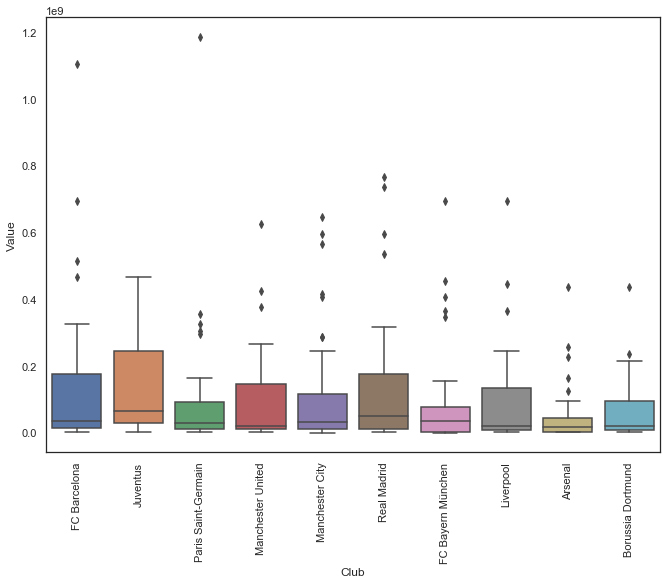

In [96]:
sns.set(style="white")
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Club', y = 'Value', data = top_ten_clubs_data)
p = plt.xticks(rotation=90)

Currently Juventus have the most expensive players followed by Real Madrid, FC Barcelona and Liverpool.

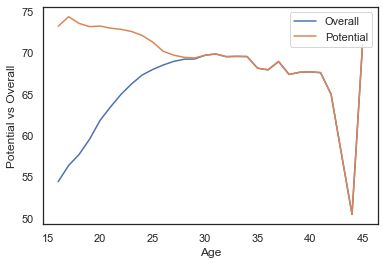

In [97]:
p = sns.lineplot(x = 'Age', y = 'Overall', ci = None, data = data, label = 'Overall')
p = sns.lineplot(x = 'Age', y = 'Potential', ci = None, data = data, label = 'Potential')
p = plt.ylabel('Potential vs Overall')
p = plt.legend(loc = 1)

Players spend their time from age 15 to around 30 meeting their expected potential.

# Do player costs differ by player's age?

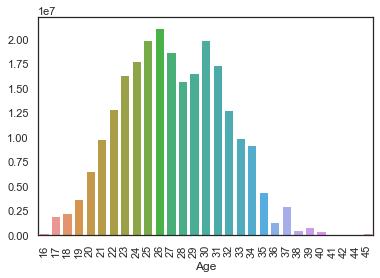

In [98]:
mean_value_per_age = data.groupby('Age')['Value'].mean()
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values)
p = plt.xticks(rotation=90)

Players are most expensive between age 22-30.

# Do wages differ by player's age?

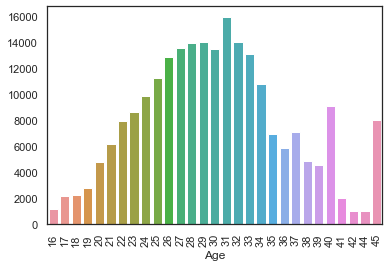

In [99]:
mean_wage_per_age = data.groupby('Age')['Wage'].mean()
p = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values)
p = plt.xticks(rotation=90)

Players wages start growing exponentially after age 20 and reach a peak at age 27-32 after which it reduces steeply again..

# Does position have a say in a player's value?

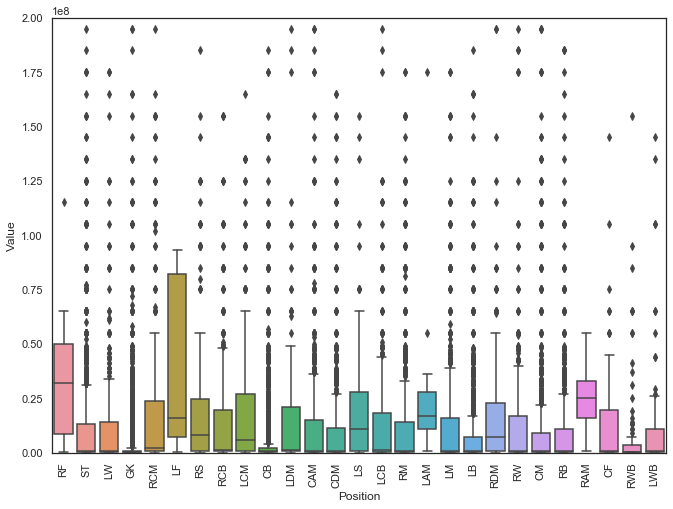

In [100]:
avg_value_by_position = data.groupby('Position')['Value'].mean()
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Position', y = 'Value', data = data)
p = plt.xticks(rotation=90)
p = plt.ylim(0, 200000000)

Turns out, players playing at LF and RF have highest market value, followed by midefield positions. The order is forwards > midfielders > defenders > goalkeepers.

#### Correlation between all variables in the data:

In [101]:
data.corr()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.106880,-0.204610,-0.231352,-0.356191,-0.075784,-0.056914,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.058848,0.141145,0.236695,0.253765,0.059867,0.027649,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.499790,0.571926,0.606960,0.499491,0.212015,0.414463,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.457905,0.486413,0.383727,0.372993,0.162346,0.354290,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Value,-0.106880,0.058848,0.499790,0.457905,1.000000,0.623611,0.310190,0.454649,0.134772,0.264022,...,0.194791,0.366372,0.113887,0.094844,0.077349,-0.033054,-0.031571,-0.031964,-0.031807,-0.033406
Wage,-0.204610,0.141145,0.571926,0.486413,0.623611,1.000000,0.347835,0.668635,0.140849,0.263205,...,0.222440,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992
Special,-0.231352,0.236695,0.606960,0.383727,0.310190,0.347835,1.000000,0.292208,0.341855,0.763412,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.454649,0.668635,0.292208,1.000000,0.128317,0.208153,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.134772,0.140849,0.341855,0.128317,1.000000,0.340721,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.264022,0.263205,0.763412,0.208153,0.340721,1.000000,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925


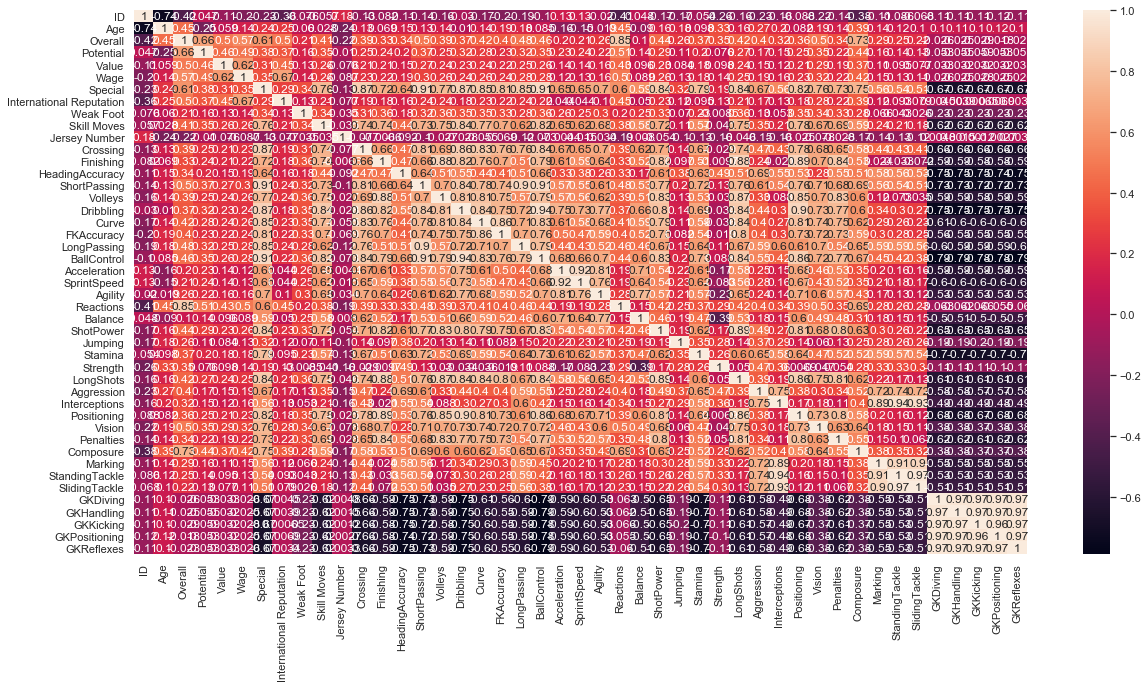

In [102]:
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(),annot = True,ax = ax)